<a href="https://colab.research.google.com/github/DipaliKariya/Data_cleaning/blob/main/Car_price_prediction_Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

Load Dataset

In [2]:
car_data = pd.read_csv('/content/car data (1).csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_data.drop(['Car_Name'],axis = 1, inplace = True)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
car_data['Owner'].unique()

array([0, 1, 3])

In [8]:
car_data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
car_data['Fuel_Type'] = car_data['Fuel_Type'].replace(('Petrol','Diesel','CNG'),(0,1,2)) 
car_data['Seller_Type'] = car_data['Seller_Type'].replace(('Dealer','Individual'),(0,1)) 
car_data['Transmission'] = car_data['Transmission'].replace(('Manual','Automatic'),(0,1)) 

In [11]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


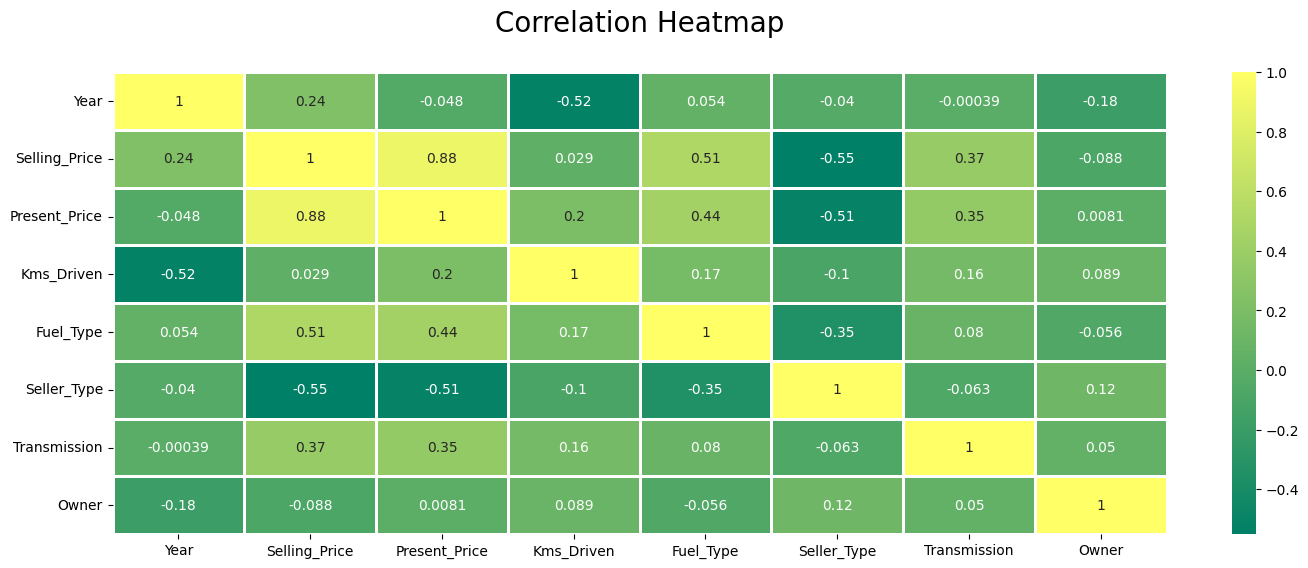

In [12]:
plt.rcParams['figure.figsize'] = (17, 6)
sns.heatmap(car_data.corr(), 
            annot = True, linewidths = 2.0,
           cmap = 'summer')
plt.title('Correlation Heatmap\n', fontsize = 20)
plt.show()

In [13]:
X = car_data.drop(['Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size= 0.2, shuffle = True, random_state=4)

1. Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(Xtrain,Ytrain)


train_predictions1 = model1.predict(Xtrain)
test_predictions1 = model1.predict(Xtest)

In [16]:
# prediction on training dataset

error_score = metrics.r2_score(Ytrain, train_predictions1)
print('R squared error : ', error_score )

R squared error :  0.9802932063345003


In [17]:
#prediction on test dataset

error_score = metrics.r2_score(Ytest, test_predictions1)
print('R squared error :', error_score)

R squared error : 0.9088929338852337


2. Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()
model2.fit(Xtrain, Ytrain)

train_predictions2 = model2.predict(Xtrain)
test_predictions2 = model2.predict(Xtest)

In [19]:
# prediction on training dataset

error_score = metrics.r2_score(Ytrain, train_predictions2)
print('R squared error : ', error_score )

R squared error :  0.9955252707634203


In [20]:
#prediction on test dataset

error_score = metrics.r2_score(Ytest, test_predictions2)
print('R squared error :', error_score)

R squared error : 0.920138520119915


Comparison of R2 score

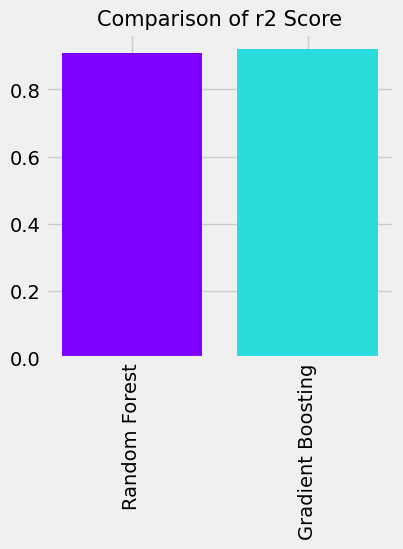

In [21]:
r2_score = np.array([0.91, 0.92])
labels = np.array(['Random Forest','Gredient Bo0sting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4,4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 2), ['Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()